In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/beans/bespoke')

from constants import *
from imports import *
from traj_utils import *

In [4]:
get_target_wp_dist(0)

4.0

In [5]:
mph_to_mps(10)

4.4704

In [2]:
%%time
get_obs_per_sec()

CPU times: user 4.01 ms, sys: 0 ns, total: 4.01 ms
Wall time: 3.51 ms


(94.6, 6.26)

In [6]:
%%time
get_mins_since_slowest_runner_reported()

ValueError: max() arg is an empty sequence

In [36]:
for i in range(10_000):
    print(round(get_mins_since_slowest_runner_reported(), 2), get_obs_per_sec())
    time.sleep(60*1)

/home/beans/bespoke/constants.py:435: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propref_aux_target['ixx'] = list(range(len(propref_aux_target))) # dumb self ix so can grab sigmoid from within this smaller df


0.29 (22.66, 7.28)
1.29 (71.05, 5.42)
2.29 (76.38, 5.33)
3.12 (78.25, 5.33)
3.28 (86.39, 5.42)
2.59 (88.98, 6.0)
3.06 (87.8, 6.0)
3.67 (78.55, 5.32)
3.87 (76.37, 5.32)
2.48 (75.06, 5.32)
2.53 (93.59, 5.39)
2.91 (97.75, 5.39)
2.66 (101.82, 6.57)
3.36 (101.74, 6.57)
3.43 (94.62, 6.15)
2.81 (86.28, 5.8)
2.89 (88.15, 5.8)
2.45 (95.72, 6.2)
3.09 (96.13, 6.2)
3.37 (88.82, 5.55)
3.62 (88.53, 5.55)
2.95 (81.79, 5.55)
1.97 (87.13, 5.72)
1.98 (100.1, 6.84)
2.98 (104.8, 6.84)
3.21 (100.33, 5.5)
3.41 (91.96, 5.5)
2.1 (83.09, 5.49)
3.06 (88.55, 5.49)
3.32 (93.93, 5.49)
3.62 (92.16, 5.49)
2.99 (85.56, 5.76)
3.2 (87.93, 5.76)
2.75 (91.02, 5.98)
2.73 (88.8, 5.98)
2.64 (89.97, 5.98)
2.35 (92.65, 6.55)
3.17 (96.87, 6.55)
3.21 (95.37, 6.13)
3.06 (87.97, 6.13)
3.28 (84.43, 5.87)
2.52 (85.19, 5.85)
3.05 (91.01, 5.85)
2.63 (91.57, 5.85)
3.1 (97.93, 6.23)
2.63 (92.17, 6.23)
2.4 (95.51, 6.34)
2.74 (94.74, 6.34)
2.74 (95.17, 6.28)
3.45 (90.42, 6.18)
2.85 (85.78, 5.87)
3.47 (85.59, 5.87)
3.86 (91.36, 5.87)
2.87

KeyboardInterrupt: 

In [7]:
# Shut down trainer
set_trainer_should_stop(True)

In [44]:
t = torch.randn((3,4))
t[0][0] = torch.nan

In [45]:
torch.clamp(t, -10, 10)

tensor([[    nan,  0.2464,  0.2079, -0.3504],
        [ 0.7383, -0.5889, -0.2498,  0.6668],
        [-0.1999, -0.0737, -0.8708, -0.5061]])

In [28]:
# Shut down loader
#set_loader_should_stop(True)

In [8]:
# Shut down datagen
set_should_stop(True)

In [23]:
moving_average(np.array([0,1.1,2,3.5,4.9,5,6,7,8,9,10,11,12,13]),w=5)

array([ 0.  ,  1.1 ,  2.3 ,  3.3 ,  4.28,  5.28,  6.18,  7.  ,  8.  ,
        9.  , 10.  , 11.  , 12.  , 13.  ])

In [12]:
import math
original_angle = .03
road_roll = .03
new_angle = original_angle - math.atan(road_roll)
new_angle

8.995143122098731e-06

In [13]:
math.atan(.1)

0.09966865249116204

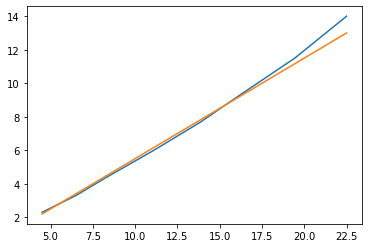

In [26]:
min_dist_lookup = [
    (4.5, 2.3), # 10 mph
    (6.5, 3.3), # 14.5 mph
    (8.33, 4.4), #18 mph (speed mps, wp dist m)
    (11.11, 6.), # 24 mph
    (13.89, 7.7), # 30 mph
    (16.2, 9.3), # 36 mph
    (19.44, 11.5), # 43 mph
    (22.5, 14), # 50 mph
]
min_dist_bps = [x[0] for x in min_dist_lookup]
min_dist_vals = [x[1] for x in min_dist_lookup]

plt.plot(min_dist_bps, min_dist_vals)
plt.plot(min_dist_bps, [v*.6-.5 for v in min_dist_bps]) #TODO test out this instead. may need something like abq, no roll but curvy


In [11]:
4/6.5

0.6153846153846154

In [19]:
ACCELERATION_DUE_TO_GRAVITY = 9.8
roll = .03
sf = 1/401
u = 20

m = 1700
l = 2.66
aF = l * .41
aR = l - aF
tire_stiffness_factor = .677
cF, cR = tire_stiffness_factor, tire_stiffness_factor
sf = m * (cF*aF - cR*aR) / (l**2 * cF * cR)

In [22]:
(cF*aF - cR*aR)

-0.3241476

In [20]:
sf

-169.92259081973765

In [21]:
roll_compensation = (ACCELERATION_DUE_TO_GRAVITY * roll) / ((1 / sf) - u**2)
#roll_compensation = (ACCELERATION_DUE_TO_GRAVITY * roll) / u**2
roll_compensation

-0.0007349891864115468

In [197]:
roll_compensation_angles = CRV_WHEELBASE * roll_compensation
roll_compensation_angles

0.0019551

In [198]:
from traj_utils import *
tire_angles_to_max_speeds(.02), tire_angles_to_max_speeds(.02-roll_compensation_angles)

(14.18929668510425, 14.934187811096537)

In [3]:
# set lr
set_lr(1e-4)

In [37]:
dataloader_root = f"{BLENDER_MEMBANK_ROOT}/dataloader_06"
current_run = np.load(f"{dataloader_root}/run_counter.npy")[0]
current_run

40